# Final Project: OJAS SHARMA

# 1) Acquire the data

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, svm, metrics

from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import warnings
warnings.simplefilter("ignore")



In [2]:
df=pd.read_csv("zomato new.csv")

In [3]:
df

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
df = df.drop(["url","address","name","phone","reviews_list","menu_item"],axis=1)

In [5]:
df.columns

Index(['Unnamed: 0', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum() 

Unnamed: 0                         0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df['rate'].unique()
df = df.loc[df.rate != 'NEW']
df = df.loc[df.rate != '-'].reset_index(drop = True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [10]:
df["rate"] = df["rate"].fillna(df["rate"].median())


In [11]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0                     0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
categorical_var = ['rate','online_order','approx_cost(for two people)','book_table','location','rest_type','dish_liked','cuisines','listed_in(type)','listed_in(city)']
le = LabelEncoder()
for i in categorical_var:
    df[i] = le.fit_transform(df[i])
df.head()

,Unnamed: 0,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,0,1,1,22,775,1,20,3605,1386,53,0,1
1,1,1,0,22,787,1,20,2931,594,53,0,1
2,2,1,0,19,918,1,16,1398,484,53,0,1
3,3,0,0,18,88,1,62,2733,1587,36,0,1
4,4,0,0,19,166,4,20,3413,1406,49,0,1


# 3) Train Test Split

In [14]:
X = df.drop('rate',axis=1)
y = df['rate']

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [16]:
from sklearn.preprocessing import StandardScaler # Scaling for normalization
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
bins = (0,20,40,60,80,100) # range type for good bad
group_names = [ '0', '1', '2', '3', '4']
categories = pd.cut(df['rate'], bins, labels = group_names)
df['rate'] = categories

In [18]:
le = LabelEncoder()
df['rate'] = le.fit_transform(df['rate'].astype(str))
# astype(str) is here, because rate contain string+foat values.
# it will cause compatibility error while label encoding.
df.head()

,Unnamed: 0,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,0,1,1,1,775,1,20,3605,1386,53,0,1
1,1,1,0,1,787,1,20,2931,594,53,0,1
2,2,1,0,0,918,1,16,1398,484,53,0,1
3,3,0,0,0,88,1,62,2733,1587,36,0,1
4,4,0,0,0,166,4,20,3413,1406,49,0,1


# 3) AGAIN Train Test Split

In [19]:
X = df.drop('rate',axis=1)
y = df['rate']

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [21]:
from sklearn.preprocessing import StandardScaler # Scaling for normalization
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# CASE 1: LinearRegression

## Training the model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
my_model = LinearRegression() 
result = my_model.fit(X_train, y_train) 

## Testing the model

In [24]:
predictions = result.predict(X_test) 
predictions

array([0.26701609, 0.31479631, 0.29828949, ..., 0.79453265, 0.41779049,
       0.78034064])

#### Plot the Line

plt.scatter(X_train, y_train, color ='c') 
plt.plot(X_test, predictions, color ='k') 
plt.show() 

#### Measuring performance by using r^2 of regression

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test,predictions)

0.2049005233598883

## Deploying the Model

In [27]:
pred_new=result.predict([[300,451,0,155,68,36,777,2,456,1,99]]) 

In [28]:
pred_new

array([13.7141557])

# CASE 2: DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
my_model = DecisionTreeClassifier(random_state=0)
result = my_model.fit(X_train,y_train)

##  Testing the Model

In [31]:
predictions = result.predict(X_test)
predictions

array([0, 1, 0, ..., 1, 1, 0])

In [32]:
from sklearn.metrics import mean_absolute_error,accuracy_score

In [33]:
mean_absolute_error(y_test, predictions)

0.04701588664662946

In [34]:
accuracy_score(y_test,predictions)

0.9529841133533705

In [35]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2224
           1       0.95      0.96      0.96      2433
           2       1.00      1.00      1.00         1

    accuracy                           0.95      4658
   macro avg       0.97      0.97      0.97      4658
weighted avg       0.95      0.95      0.95      4658



##  Deploying the Model

In [36]:
 pred_new=result.predict([[180,451,33,155,68,36,7,222,4,121,99]]) 
pred_new

array([0])

# CASE 3: LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
my_model = LogisticRegression()

In [39]:
result = my_model.fit(X_train, y_train)

### Testing the Model

In [40]:
predictions = result.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 1])

#### Measure Performance of Model using Performance Metrics

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, predictions)

0.7226277372262774

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
confusion_df = confusion_matrix(y_test, predictions)

In [45]:
confusion_df

array([[1843,  381,    0],
       [ 910, 1523,    0],
       [   1,    0,    0]], dtype=int64)

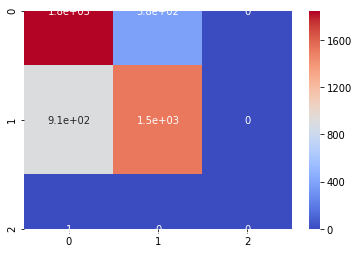

In [46]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot = True)

In [47]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74      2224
           1       0.80      0.63      0.70      2433
           2       0.00      0.00      0.00         1

    accuracy                           0.72      4658
   macro avg       0.49      0.48      0.48      4658
weighted avg       0.74      0.72      0.72      4658



## Deploy the Model

In [48]:
pred_new=my_model.predict([[0,4,33,5,68,36,7,51,4,965,9]])
pred_new

array([2])

# CASE 4: BAGGING

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
my_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

In [51]:
result = my_model.fit(X_train, y_train)

## Testing the model

In [52]:
predictions = result.predict(X_test)

In [53]:
predictions

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7574066122799484

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
import seaborn as sn
conf_matrix =confusion_matrix(predictions,y_test)

In [57]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      2224
           1       0.80      0.71      0.75      2433
           2       0.00      0.00      0.00         1

    accuracy                           0.76      4658
   macro avg       0.51      0.51      0.50      4658
weighted avg       0.76      0.76      0.76      4658



## Deploying the model

In [58]:
pred_new=list(result.predict([[0,4,478,0,655,312,7666,188,451,9,0]]))

In [59]:
pred_new

[1]

# CASE 5: RandomForest

In [60]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
result=my_model.fit(X_train, y_train)

## Testing the model

In [61]:
predictions = result.predict(X_test)

In [62]:
X_test

array([[-0.05365904,  0.65197744, -0.59185601, ...,  0.45842001,
        -0.66596297,  0.0818076 ],
       [ 0.34248994, -1.5337954 , -0.59185601, ...,  0.62568792,
         0.91392881,  0.32646217],
       [ 0.09257181,  0.65197744, -0.59185601, ...,  0.45842001,
        -0.66596297,  0.20413489],
       ...,
       [-0.50202367,  0.65197744,  1.68960013, ..., -1.77181874,
         0.91392881, -0.40750154],
       [ 0.51753409,  0.65197744, -0.59185601, ...,  0.51417598,
         0.12398292,  0.44878946],
       [ 1.08967413, -1.5337954 ,  1.68960013, ..., -1.93908665,
        -2.24585476,  0.81577131]])

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9650064405324174


In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
conf_matrix =confusion_matrix(predictions,y_test)

In [66]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      2224
           1       0.98      0.95      0.97      2433
           2       1.00      1.00      1.00         1

    accuracy                           0.97      4658
   macro avg       0.98      0.98      0.98      4658
weighted avg       0.97      0.97      0.97      4658



## Deploying the model

In [67]:
pred_new = result.predict([[0,4,478,0,655,312,7666,188,451,9,0]])

In [68]:
pred_new

array([1])

# CASE 6: KNN

## Training the Model

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

In [70]:
print('With KNN (K=3) accuracy is: ', knn.score(X_test,y_test))

With KNN (K=3) accuracy is:  0.7825246887075998


In [71]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,prediction))


**Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78      2224
           1       0.80      0.77      0.79      2433
           2       1.00      1.00      1.00         1

    accuracy                           0.78      4658
   macro avg       0.85      0.86      0.85      4658
weighted avg       0.78      0.78      0.78      4658



In [72]:
#Best K value selection
neig = np.arange(1,30)
training_accuracy=[]
test_accuracy = []
for i, k in enumerate (neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

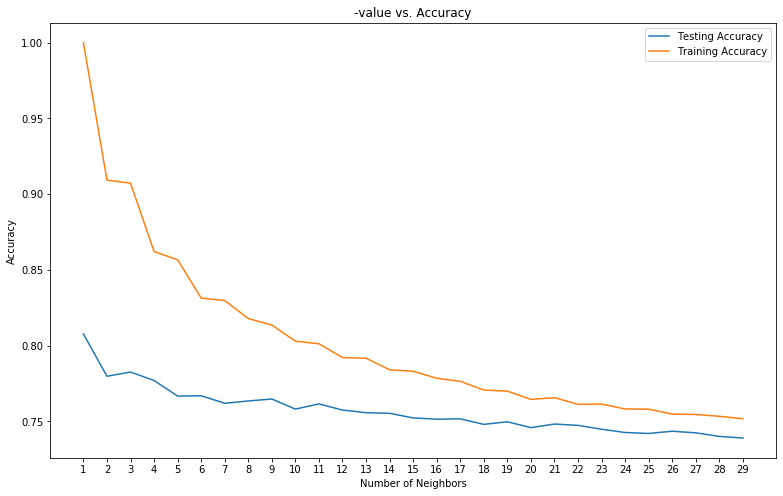

Best Accuracy is 0.8076427651352511 with K = 1


In [73]:
# Plot
plt.figure(figsize=(13,8))
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, training_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value vs. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

## Testing the Model

In [75]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, ..., 1, 1, 1])

In [76]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,pred))


**Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76      2224
           1       0.80      0.72      0.76      2433
           2       0.00      0.00      0.00         1

    accuracy                           0.76      4658
   macro avg       0.51      0.51      0.51      4658
weighted avg       0.77      0.76      0.76      4658



# CASE 6: SVM

## TrainTestSplit

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(17466, 11), (17466,)
Test data and target sizes: 
(5822, 11), (5822,)


## Training the Model

In [78]:
# Creating a classifier: a support vector classifier
my_model = svm.SVC(gamma=0.001)
# Fitting the trainin' data
result= my_model.fit(X_train,y_train)

## Testing the Model

In [79]:
predictions = result.predict(X_test)

In [80]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [81]:
y_test

21921    1
28709    1
23877    0
14332    0
41922    1
        ..
18180    0
535      1
38188    0
32210    1
19772    1
Name: rate, Length: 5822, dtype: int32

## Deploying the model

In [82]:
pred_new = (result.predict([[55,41,89,32,479,0,7,18,1,469,69]]))
pred_new

array([1])

In [83]:
print("Classification report for classifier %s:\n%s\n"
      % (my_model, metrics.classification_report(y_test, predictions)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.91      0.01      0.03      2878
           1       0.51      1.00      0.67      2943
           2       0.00      0.00      0.00         1

    accuracy                           0.51      5822
   macro avg       0.47      0.34      0.23      5822
weighted avg       0.71      0.51      0.35      5822




In [84]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

Confusion matrix:
[[  42 2836    0]
 [   4 2939    0]
 [   0    1    0]]


In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.5120233596702164

#### Observation 1 : As in Linear Regression the r^2 score(coefficient of determination) which close to ZERO, so this indicates that our model is very BAD.So we ignore this model.

### Observation 2 : After analyzing rest 5 models, I conclude that the accuracy of "RandomForest" model is the  highest amongst all.                    So I will choose this model to determine the rating of the restaurant . 